# Statistics review 6: Nonparametric methods

R code accompanying [paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC153434/pdf/cc1820.pdf)

## Key learning points

- Common nonparametric methods
- Advantages and disadvantages of nonparametric versus parametric methods

In [1]:
suppressPackageStartupMessages(library(tidyverse))

In [8]:
options(repr.plot.width=4, repr.plot.height=3)

## The sign test

In [9]:
rr <- c(0.75, 2.03, 2.29, 2.11, 0.80, 1.50, 0.79, 1.01, 
        1.23, 1.48, 2.45, 1.02, 1.03, 1.30, 1.54, 1.27)

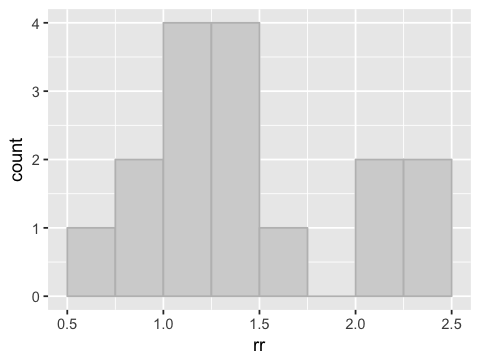

In [23]:
ggplot(data.frame(rr=rr), aes(x=rr)) +
geom_histogram(breaks=seq(0.5, 2.5, 0.25), color='gray', fill='lightgray') 

In [37]:
n <- length(rr)
k <- sum(rr > 1)
p <- 0.5

In [40]:
S <- min(k, n-k)
S

[1] 3

#### Calculation of p value from binomial distribution

How likely are we to see 3 heads or fewer in 16 tosses of a fair coin? This is the p-value (double for two-sided test).

In [46]:
round(2 * pbinom(S, n, p), 2)

[1] 0.02

This is the same as summing the probabilities for 0, 1, 2, and 3 heads.

In [48]:
round(2 * sum(dbinom(0:S, n, p)), 2)

[1] 0.02

## Sign test for paired data

In [49]:
before <- c(39.7, 59.1, 56.1, 57.7, 60.6, 37.8, 58.2, 33.6, 56.0, 65.3)
after <- c(52.9, 56.7, 61.9, 71.4, 67.7, 50.0, 60.7, 51.3, 59.5, 59.8)

df <- data.frame("Subject" = 1:length(before), "Before" = before, "After" = after)
df

Subject,Before,After
1,39.7,52.9
2,59.1,56.7
3,56.1,61.9
4,57.7,71.4
5,60.6,67.7
6,37.8,50.0
7,58.2,60.7
8,33.6,51.3
9,56.0,59.5
10,65.3,59.8


In [50]:
d <- df$After - df$Before
n <- length(d)
k <- sum(d > 0)
S <- min(k, n-k)

In [51]:
round(2 * pbinom(S, n, p), 2)

[1] 0.11

### Note that T test is more powerful

At the cost of assuming data follow a normal distribution.

In [52]:
t.test(d)


	One Sample t-test

data:  d
t = 2.8681, df = 9, p-value = 0.01853
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
  1.432413 12.127587
sample estimates:
mean of x 
     6.78 


## The Wilcoxon signed rank test

In [74]:
df$Difference <- d
df <- df %>% mutate(rank=rank(abs(Difference))) %>%
mutate(sign=sign(Difference)) %>%
arrange(rank)
df

Subject,Before,After,Difference,rank,sign
2,59.1,56.7,-2.4,1,-1
7,58.2,60.7,2.5,2,1
9,56.0,59.5,3.5,3,1
10,65.3,59.8,-5.5,4,-1
3,56.1,61.9,5.8,5,1
5,60.6,67.7,7.1,6,1
6,37.8,50.0,12.2,7,1
1,39.7,52.9,13.2,8,1
4,57.7,71.4,13.7,9,1
8,33.6,51.3,17.7,10,1


In [77]:
df %>% filter(sign == 1) %>% summarise(Rp = sum(rank))

Rp
50


In [78]:
df %>% filter(sign == -1) %>% summarise(Rn = sum(rank))

Rn
5


### Practical application of Wilcoxon signed rank test

There is no simple closed form distribution for the test statistic R, so we'll just use the built-in R function.

In [89]:
wilcox.test(df$After, df$Before, paired=TRUE)


	Wilcoxon signed rank test

data:  df$After and df$Before
V = 50, p-value = 0.01953
alternative hypothesis: true location shift is not equal to 0


## The Wilcoxon rank sum or Mann–Whitney test

In [103]:
dose <- c(7.2, 15.7, 19.1, 21.6, 26.8, 27.4, 28.5, 32.8, 36.3, 43.2, 44.7,
          5.6, 14.6, 18.2, 21.6, 23.1, 28.3, 31.7, 32.4, 36.8)
grp <- c(rep("Nonprotocolized", 11), rep("Protocolized", 9))
df <- data.frame(dose=dose, grp=grp)

In [105]:
df <- df %>% mutate(rank=rank(dose))
df

dose,grp,rank
7.2,Nonprotocolized,2.0
15.7,Nonprotocolized,4.0
19.1,Nonprotocolized,6.0
21.6,Nonprotocolized,7.5
26.8,Nonprotocolized,10.0
27.4,Nonprotocolized,11.0
28.5,Nonprotocolized,13.0
32.8,Nonprotocolized,16.0
36.3,Nonprotocolized,17.0
43.2,Nonprotocolized,19.0


In [107]:
df %>% filter(grp == "Protocolized") %>% summarise(sum=sum(rank))

sum
84.5


In [114]:
x <- df %>% filter(grp == "Protocolized") %>% select(dose)
y <- df %>% filter(grp == "Nonprotocolized") %>% select(dose)

In [119]:
wilcox.test(x[,], y[,])

Warning message in wilcox.test.default(x[, ], y[, ]):
“cannot compute exact p-value with ties”


	Wilcoxon rank sum test with continuity correction

data:  x[, ] and y[, ]
W = 39.5, p-value = 0.4703
alternative hypothesis: true location shift is not equal to 0


### Compare with T test

In [122]:
t.test(x, y)


	Welch Two Sample t-test

data:  x and y
t = -0.83661, df = 17.926, p-value = 0.4138
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -13.991115   6.023438
sample estimates:
mean of x mean of y 
 23.58889  27.57273 


## Advantages of nonparametric methods

- Nonparametric methods require no or very limited assump- tions to be made about the format of the data, and they may therefore be preferable when the assumptions required for parametric methods are not valid.
- Nonparametric methods can be useful for dealing with unex- pected, outlying observations that might be problematic with a parametric approach.
- Nonparametric methods are intuitive and are simple to carry out by hand, for small samples at least.
- Nonparametric methods are often useful in the analysis of ordered categorical data in which assignation of scores to individual categories may be inappropriate.

## Disadvantages of nonparametric methods

- Nonparametric methods may lack power as compared with more traditional approaches.
- Nonparametric methods are geared toward hypothesis testing rather than estimation of effects. 
- Tied values can be problematic when these are common.